In [0]:
import pandas as pd
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
arff=arff.loadarff('/content/drive/My Drive/EES.arff')

In [0]:
df = pd.DataFrame(arff[0])

In [0]:
df.eyeDetection = pd.to_numeric(df.eyeDetection)

# Data preprocessing

In [0]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


remove outliers

In [0]:
for col in df.columns[:-1]:
  df[col] = df[col].clip(3800,4800)

visualize the data

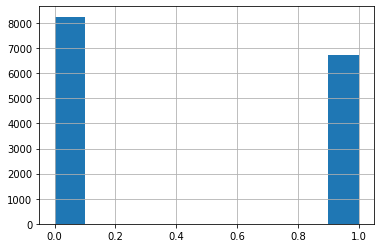

In [0]:
df.eyeDetection.hist()

In [0]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [0]:
cols = df.columns
x = [i for i in range(len(df))]
fig, axs = plt.subplots(15, sharex=True,figsize=(10, 10))
fig.suptitle('Sharing both axes')
for i in range(15):
  axs[i].plot(x,df[cols[i]])



In [0]:
row_num = 0
time_interval = 10
x_list = []
y_list = []
while row_num + time_interval < df.shape[0]:
  data = df[row_num:row_num+time_interval]
  y = list(data.eyeDetection)[-1]
  X = data.drop(columns=['eyeDetection'])
  X = X.to_numpy().flatten()
  x_list.append(X)
  y_list.append(y)
  row_num += 1
  

In [0]:
len(x_list),len(y_list)

(14970, 14970)

In [0]:
train_num = 4900
val_num = 4900
test_num = 4900
# X_train, X_test = x_list[:train_num],x_list[train_num:train_num]
X_train, X_val = pd.DataFrame(x_list[:train_num]),pd.DataFrame(x_list[train_num:train_num+val_num])
y_train, y_val = y_list[:train_num],y_list[train_num:train_num+val_num]
X_test,y_test = pd.DataFrame(x_list[train_num+val_num:train_num+val_num+test_num]),y_list[train_num+val_num:train_num+val_num+test_num]

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import random

# Compare models and tune hyperparameters
Randomly pick some parameters to search for the best one.

In [0]:
lambda_list = random.sample(range(1, 10), 5)
max_depth_list = [i for i in range(3,6)]
for l in lambda_list:
  for d in max_depth_list:
    clf1 = xgb.XGBClassifier(n_jobs=16)
    clf1.fit(X_train,y_train)
    print(l,d)
    print('accuracy:',accuracy_score(clf1.predict(X_val),y_val))
    

2 3
accuracy: 0.5726530612244898
2 4
accuracy: 0.5726530612244898
2 5
accuracy: 0.5726530612244898
7 3
accuracy: 0.5726530612244898
7 4
accuracy: 0.5726530612244898
7 5
accuracy: 0.5726530612244898
1 3
accuracy: 0.5726530612244898
1 4
accuracy: 0.5726530612244898
1 5
accuracy: 0.5726530612244898
8 3
accuracy: 0.5726530612244898
8 4
accuracy: 0.5726530612244898
8 5
accuracy: 0.5726530612244898
4 3
accuracy: 0.5726530612244898
4 4
accuracy: 0.5726530612244898
4 5
accuracy: 0.5726530612244898


In [0]:
c_list = [random.uniform(1e-8,1e-3) for i in range(5)]
for c in c_list:
  clf2 = svm.SVC(C=c,kernel='poly',max_iter = 1e8)
  clf2.fit(X_train,y_train)
  print('C:',c)
  print('accuracy:',accuracy_score(clf2.predict(X_val),y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C: 0.0003785223495765553
accuracy: 0.4253061224489796


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C: 0.0007597908104993203
accuracy: 0.4057142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C: 1.565788737881752e-05
accuracy: 0.4079591836734694


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C: 0.0004588002663916041
accuracy: 0.41183673469387755


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C: 0.0005829814653505129
accuracy: 0.42918367346938774


In [0]:
depth_list = [random.randint(5,30) for i in range(5)]
num_samples_list = [random.randint(2,10) for i in range(3)]
for d in depth_list:
  for n in num_samples_list:
    clf3 = RandomForestClassifier(max_depth=d,min_samples_split=n)
    clf3.fit(X_train,y_train)
    print(d,n)
    print('accuracy:',accuracy_score(clf3.predict(X_val),y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10 5
accuracy: 0.5620408163265306


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10 2
accuracy: 0.5781632653061225


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10 6
accuracy: 0.5606122448979591


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27 5
accuracy: 0.5355102040816326


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27 2
accuracy: 0.5248979591836734


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27 6
accuracy: 0.5308163265306123


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27 5
accuracy: 0.5404081632653062


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27 2
accuracy: 0.5351020408163265


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27 6
accuracy: 0.5622448979591836


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


23 5
accuracy: 0.5542857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


23 2
accuracy: 0.5491836734693878


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


23 6
accuracy: 0.4983673469387755


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


8 5
accuracy: 0.5242857142857142


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


8 2
accuracy: 0.5626530612244898


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


8 6
accuracy: 0.5687755102040817


In [0]:
print('accuracy of xgboost:',accuracy_score(clf1.predict(X_test),y_test))
print('accuracy of SVM:',accuracy_score(clf2.predict(X_test),y_test))
clf3 = RandomForestClassifier(max_depth=13,min_samples_split=8)
clf3.fit(X_train,y_train)
print('accuracy of RF:',accuracy_score(clf3.predict(X_test),y_test))

accuracy of xgboost: 0.6263265306122449
accuracy of SVM: 0.47551020408163264


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy of RF: 0.5906122448979592


In [0]:
from sklearn.metrics import f1_score
print('f1 score of xgboost:',f1_score(clf1.predict(X_test),y_test))
print('f1 score of SVM:',f1_score(clf2.predict(X_test),y_test))
clf3 = RandomForestClassifier(max_depth=13,min_samples_split=8)
clf3.fit(X_train,y_train)
print('f1 score of RF:',f1_score(clf3.predict(X_test),y_test))

f1 score of xgboost: 0.43505091021289727
f1 score of SVM: 0.34936708860759497


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


f1 score of RF: 0.4203860072376357


Check the distribution of the train, validation and test set.\
The performance of models are affected by the imbalanced training and test set.

In [0]:
y_train.count(1)/len(y_train),y_train.count(0)/len(y_train)

(0.5059183673469387, 0.4940816326530612)

In [0]:
y_val.count(1)/len(y_test),y_val.count(0)/len(y_test)

(0.6295918367346939, 0.3704081632653061)

In [0]:
y_test.count(1)/len(y_test),y_test.count(0)/len(y_test)

(0.23224489795918368, 0.7677551020408163)

Conclusion: The performance of non-RNN models are not significantly better than random guess. One of the possible reason is that the dataset is not balanced.
However, the performance is unlikely to significantly increase without complex data preprocessing steps, which is what we try to avoid in this project because we want to develop a more general model. 